In [ ]:
from tqdm import tqdm

import re

import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [ ]:
query_variations =pd.read_csv('/gdrive/MyDrive/SORBONNE/S2/rital/RI/projet/data/variations_trec2019_labeled.csv')
query_variations["query"] = query_variations.apply(lambda r, re=re: re.sub('[\W_]', ' ',  r['original_query'].lower()), axis=1)
query_variations["variation"] = query_variations.apply(lambda r, re=re: re.sub('[\W_]', ' ',  r['variation'].lower()), axis=1)
query_variations["variation"] = query_variations.apply(lambda r: r['query'] if r['variation'].strip() == "" else r['variation'], axis=1)
query_variations['qid'] =query_variations['q_id'].astype(str)
query_variations.head(5)

,dataset,q_id,method,transformation_type,original_query,variation,valid,follow_category,query,qid
0,msmarco,1037798,WordSwapNeighboringCharacterSwap,mispelling,who is robert gray,who is robret gray,True,True,who is robert gray,1037798
1,msmarco,104861,WordSwapNeighboringCharacterSwap,mispelling,cost of interior concrete flooring,cost of interior concrete floroing,True,True,cost of interior concrete flooring,104861
2,msmarco,1063750,WordSwapNeighboringCharacterSwap,mispelling,why did the us volunterilay enter ww1,why did the su volunterilay enter ww1,True,True,why did the us volunterilay enter ww1,1063750
3,msmarco,1103812,WordSwapNeighboringCharacterSwap,mispelling,who formed the commonwealth of independent states,who formed the commonweatlh of independent states,True,True,who formed the commonwealth of independent states,1103812
4,msmarco,1106007,WordSwapNeighboringCharacterSwap,mispelling,define visceral,define vsiceral,True,True,define visceral,1106007


# dataset

In [ ]:
def save_pickle(path,some_obj):
  with open(path, 'wb') as f:
    pickle.dump(some_obj, f)


def open_pickle(path):
  with open(path, 'rb') as handle:
      b = pickle.load(handle)
  return b 

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style="darkgrid")

def return_boxplot(model_name,df):

  mispelling =['QueriesFromWordSwapNeighboringCharacterSwap',
        'QueriesFromWordSwapQWERTY',
        'QueriesFromWordSwapRandomCharacterSubstitution'
        ]

  ordering = ['QueriesFromWordInnerSwapRandom']

  naturality = ['QueriesFromnaturality_by_removing_stop_words',
                'QueriesFromsummarization_with_t5-base_from_description_to_title'
                ]
  paraphrasing = ['QueriesFromback_translation_pivot_language_de',
                  'QueriesFromramsrigouthamg/t5_paraphraser',
                  'QueriesFromWordSwapEmbedding',
                  'QueriesFromWordSwapWordNet'
                  ]
  df['ndcg_cut.10'] = df.iloc[0,1]-df['ndcg_cut.10']
  df = df.replace([model_name +l for l in mispelling],'Mispelling')
  df =df.replace([model_name +l for l in naturality],'Naturality')
  df =df.replace([model_name +l for l in ordering],'Ordering')
  df =df.replace([model_name +l for l in paraphrasing],'Paraphrasing')
  df = df[["name","ndcg_cut.10"]]
  df = df.drop(0)

  ax = sns.boxplot(x="name", y="ndcg_cut.10", data=df,linewidth=2)    
  # adding transparency to colors
  for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
  plt.title('Boxplot '+model_name)
  plt.show()
  return df
  


## A1 : importing data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


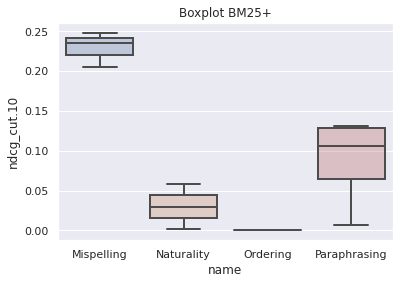

In [ ]:
#BM25
model_name = 'BM25+'

path = "/gdrive/MyDrive/SORBONNE/S2/rital/RI/projet/pickle/trec/variations/_BM25_trec"
scores_variation = open_pickle(path)
scores_variation =scores_variation[["name","ndcg_cut.10","ndcg_cut.10 p-value"]]
scores_variation.round(6)
df =return_boxplot(model_name,scores_variation[["name","ndcg_cut.10"]])

In [ ]:
df_BM25 = df.rename(columns={"ndcg_cut.10": "BM25"})
df_BM25

,name,BM25
1,Mispelling,0.205757
2,Mispelling,0.235854
3,Mispelling,0.248142
4,Naturality,0.001786
5,Naturality,0.057921
6,Ordering,0.000000
7,Paraphrasing,0.083103
8,Paraphrasing,0.007328
9,Paraphrasing,0.130774
10,Paraphrasing,0.127631


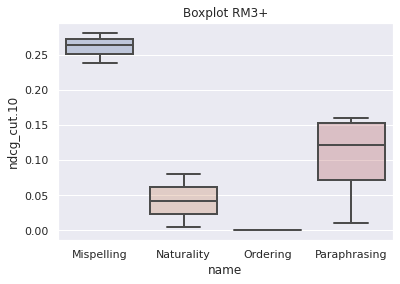

In [ ]:
#RM3
model_name = 'RM3+'

path = "/gdrive/MyDrive/SORBONNE/S2/rital/RI/projet/pickle/trec/variations/_RM3_trec"
scores_variation = open_pickle(path)
scores_variation =scores_variation[["name","ndcg_cut.10","ndcg_cut.10 p-value"]]
scores_variation.round(6)
df = return_boxplot(model_name,scores_variation)

In [ ]:
df_RM3 = df.rename(columns={"ndcg_cut.10": "RM3"})
df_RM3

,name,RM3
1,Mispelling,0.238052
2,Mispelling,0.264221
3,Mispelling,0.281322
4,Naturality,0.004792
5,Naturality,0.080207
6,Ordering,0.000000
7,Paraphrasing,0.092441
8,Paraphrasing,0.010587
9,Paraphrasing,0.151511
10,Paraphrasing,0.159707


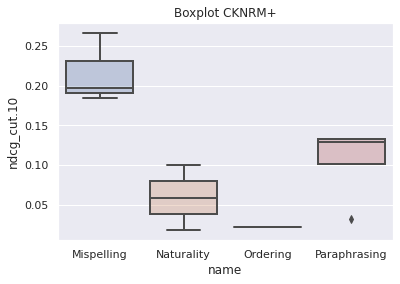

In [ ]:
#CKNRM
model_name = 'CKNRM+'

path = "/gdrive/MyDrive/SORBONNE/S2/rital/RI/projet/pickle/trec/variations/_CKNRM_trec"
scores_variation = open_pickle(path)
scores_variation =scores_variation[["name","ndcg_cut.10","ndcg_cut.10 p-value"]]
scores_variation.round(6)
df = return_boxplot(model_name,scores_variation)

In [ ]:
df_CKNRM = df.rename(columns={"ndcg_cut.10": "CKNRM"})
df_CKNRM

,name,CKNRM
1,Mispelling,0.185131
2,Mispelling,0.196579
3,Mispelling,0.266867
4,Naturality,0.017519
5,Naturality,0.100366
6,Ordering,0.022361
7,Paraphrasing,0.132632
8,Paraphrasing,0.032241
9,Paraphrasing,0.132620
10,Paraphrasing,0.125116


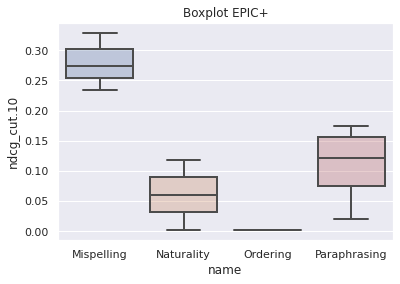

In [ ]:
#EPIC
model_name = 'EPIC+'

path = "/gdrive/MyDrive/SORBONNE/S2/rital/RI/projet/pickle/trec/variations/_EPIC_trec"
scores_variation = open_pickle(path)
scores_variation =scores_variation[["name","ndcg_cut.10","ndcg_cut.10 p-value"]]
scores_variation.round(6)
df = return_boxplot(model_name,scores_variation)

In [ ]:
df_EPIC = df.rename(columns={"ndcg_cut.10": "EPIC"})
df_EPIC

,name,EPIC
1,Mispelling,0.234733
2,Mispelling,0.274412
3,Mispelling,0.329064
4,Naturality,0.002662
5,Naturality,0.117976
6,Ordering,0.001326
7,Paraphrasing,0.093965
8,Paraphrasing,0.020002
9,Paraphrasing,0.175003
10,Paraphrasing,0.149163


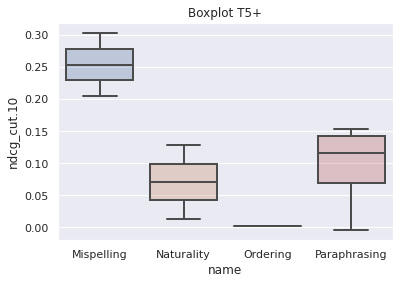

In [ ]:
#T5
model_name = 'T5+'

path = "/gdrive/MyDrive/SORBONNE/S2/rital/RI/projet/pickle/trec/variations/_T5_trec"
scores_variation = open_pickle(path)
scores_variation =scores_variation[["name","ndcg_cut.10","ndcg_cut.10 p-value"]]
scores_variation.round(6)
df = return_boxplot(model_name,scores_variation)

In [ ]:
df_T5 = df.rename(columns={"ndcg_cut.10": "T5"})
df_T5

,name,T5
1,Mispelling,0.205363
2,Mispelling,0.253798
3,Mispelling,0.303469
4,Naturality,0.013621
5,Naturality,0.128097
6,Ordering,0.002759
7,Paraphrasing,0.093964
8,Paraphrasing,-0.004740
9,Paraphrasing,0.154047
10,Paraphrasing,0.139521


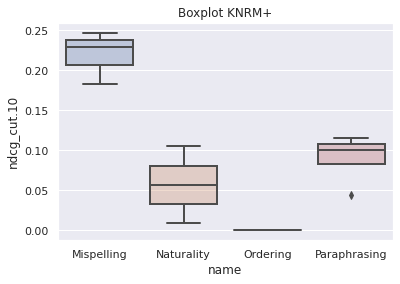

In [ ]:
#KNRM
model_name = 'KNRM+'

path = "/gdrive/MyDrive/SORBONNE/S2/rital/RI/projet/pickle/trec/variations/_KNRM_trec"
scores_variation = open_pickle(path)
scores_variation =scores_variation[["name","ndcg_cut.10","ndcg_cut.10 p-value"]]
scores_variation.round(6)
df =return_boxplot(model_name,scores_variation)

In [ ]:
df_KNRM = df.rename(columns={"ndcg_cut.10": "KNRM"})
df_KNRM

,name,KNRM
1,Mispelling,0.183437
2,Mispelling,0.229550
3,Mispelling,0.247056
4,Naturality,0.008645
5,Naturality,0.104972
6,Ordering,0.000000
7,Paraphrasing,0.095941
8,Paraphrasing,0.044529
9,Paraphrasing,0.115807
10,Paraphrasing,0.104901


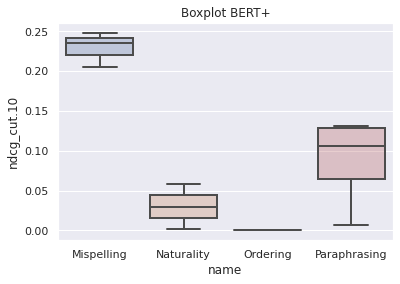

In [ ]:
#BERT
model_name = 'BERT+'

path = "/gdrive/MyDrive/SORBONNE/S2/rital/RI/projet/pickle/trec/variations/_BERT_trec"
scores_variation = open_pickle(path)
scores_variation =scores_variation[["name","ndcg_cut.10","ndcg_cut.10 p-value"]]
scores_variation.round(6)
df =return_boxplot(model_name,scores_variation)

In [ ]:
df_BERT = df.rename(columns={"ndcg_cut.10": "BERT"})
df_BERT

,name,BERT
1,Mispelling,0.205757
2,Mispelling,0.235854
3,Mispelling,0.248142
4,Naturality,0.001786
5,Naturality,0.057921
6,Ordering,0.000000
7,Paraphrasing,0.083103
8,Paraphrasing,0.007328
9,Paraphrasing,0.130774
10,Paraphrasing,0.127631


findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


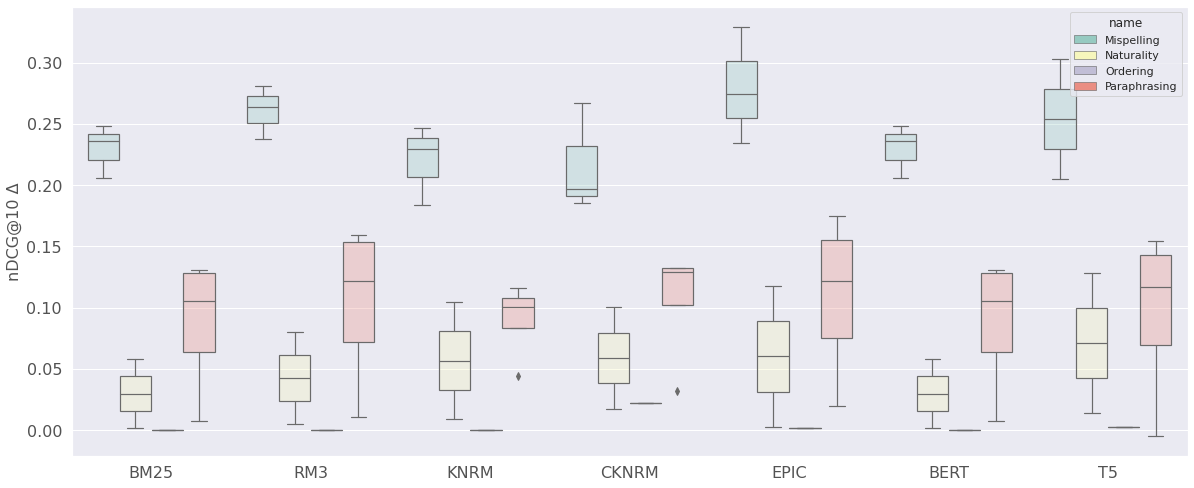

In [ ]:


df_merge  =(pd.merge(df_BM25, df_RM3, left_index=True, right_index=True)).drop(['name_y'],axis=1)
df_merge = df_merge.rename({'nae_x': 'name'})
df_merge['name'] = df_merge['name_x']
df_merge = df_merge.drop(['name_x'],axis=1)

df_merge = (pd.merge(df_merge, df_KNRM, left_index=True, right_index=True)).drop(['name_y'],axis=1)
df_merge = df_merge.rename({'nae_x': 'name'})
df_merge['name'] = df_merge['name_x']
df_merge = df_merge.drop(['name_x'],axis=1)

df_merge = (pd.merge(df_merge, df_CKNRM, left_index=True, right_index=True)).drop(['name_y'],axis=1)
df_merge = df_merge.rename({'nae_x': 'name'})
df_merge['name'] = df_merge['name_x']
df_merge = df_merge.drop(['name_x'],axis=1)

df_merge = (pd.merge(df_merge, df_EPIC, left_index=True, right_index=True)).drop(['name_y'],axis=1)
df_merge = df_merge.rename({'nae_x': 'name'})
df_merge['name'] = df_merge['name_x']
df_merge = df_merge.drop(['name_x'],axis=1)


df_merge = (pd.merge(df_merge, df_BERT, left_index=True, right_index=True)).drop(['name_y'],axis=1)
df_merge = df_merge.rename({'nae_x': 'name'})
df_merge['name'] = df_merge['name_x']
df_merge = df_merge.drop(['name_x'],axis=1)



df_merge = (pd.merge(df_merge, df_T5, left_index=True, right_index=True)).drop(['name_y'],axis=1)
df_merge = df_merge.rename({'nae_x': 'name'})
df_merge['name'] = df_merge['name_x']
df_merge = df_merge.drop(['name_x'],axis=1)


sns.set(rc={'figure.figsize':(20,8.27)})
ax = sns.boxplot(x='variable',y='value',hue='name', 
                 data=df_merge.melt(id_vars=['name']),palette='Set3', 
                 linewidth=1.2)    
# adding transparency to colors
for patch in ax.artists:
  r, g, b, a = patch.get_facecolor()
  patch.set_facecolor((r, g, b, .3))

            
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Calibri'}

ax.set_ylabel('nDCG@10 Δ', fontsize=16, color=font_color, **hfont)
ax.set_xlabel('', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)


plt.show()

In [ ]:
df_mispelling = df_merge[df_merge['name']=='Mispelling']
df_naturality = df_merge[df_merge['name']=='Naturality']
df_ordering = df_merge[df_merge['name']=='Ordering']
df_paraphrasing = df_merge[df_merge['name']=='Paraphrasing']

In [ ]:
df_mispelling.corr(method ='pearson')


,BM25,RM3,KNRM,CKNRM,EPIC,BERT,T5
BM25,1.000000,0.993096,0.999872,0.806911,0.946246,1.000000,0.970074
RM3,0.993096,1.000000,0.991091,0.870627,0.977654,0.993096,0.991859
KNRM,0.999872,0.991091,1.000000,0.797349,0.940945,0.999872,0.966061
CKNRM,0.806911,0.870627,0.797349,1.000000,0.954588,0.806911,0.926185
EPIC,0.946246,0.977654,0.940945,0.954588,1.000000,0.946246,0.996465
BERT,1.000000,0.993096,0.999872,0.806911,0.946246,1.000000,0.970074
T5,0.970074,0.991859,0.966061,0.926185,0.996465,0.970074,1.000000


In [ ]:
df_naturality.corr(method ='pearson')

,BM25,RM3,KNRM,CKNRM,EPIC,BERT,T5
BM25,1.0,1.0,1.0,1.0,1.0,1.0,1.0
RM3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
KNRM,1.0,1.0,1.0,1.0,1.0,1.0,1.0
CKNRM,1.0,1.0,1.0,1.0,1.0,1.0,1.0
EPIC,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BERT,1.0,1.0,1.0,1.0,1.0,1.0,1.0
T5,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df_paraphrasing.corr(method ='pearson')

,BM25,RM3,KNRM,CKNRM,EPIC,BERT,T5
BM25,1.000000,0.995664,0.978915,0.910967,0.985730,1.000000,0.997677
RM3,0.995664,1.000000,0.956225,0.879289,0.978429,0.995664,0.987179
KNRM,0.978915,0.956225,1.000000,0.964842,0.963301,0.978915,0.989047
CKNRM,0.910967,0.879289,0.964842,1.000000,0.860573,0.910967,0.924249
EPIC,0.985730,0.978429,0.963301,0.860573,1.000000,0.985730,0.988137
BERT,1.000000,0.995664,0.978915,0.910967,0.985730,1.000000,0.997677
T5,0.997677,0.987179,0.989047,0.924249,0.988137,0.997677,1.000000


In [ ]:
df_merge

,BM25,RM3,KNRM,CKNRM,EPIC,BERT,T5,name
1,0.205757,0.238052,0.183437,0.185131,0.234733,0.205757,0.205363,Mispelling
2,0.235854,0.264221,0.229550,0.196579,0.274412,0.235854,0.253798,Mispelling
3,0.248142,0.281322,0.247056,0.266867,0.329064,0.248142,0.303469,Mispelling
4,0.001786,0.004792,0.008645,0.017519,0.002662,0.001786,0.013621,Naturality
5,0.057921,0.080207,0.104972,0.100366,0.117976,0.057921,0.128097,Naturality
6,0.000000,0.000000,0.000000,0.022361,0.001326,0.000000,0.002759,Ordering
7,0.083103,0.092441,0.095941,0.132632,0.093965,0.083103,0.093964,Paraphrasing
8,0.007328,0.010587,0.044529,0.032241,0.020002,0.007328,-0.004740,Paraphrasing
9,0.130774,0.151511,0.115807,0.132620,0.175003,0.130774,0.154047,Paraphrasing
10,0.127631,0.159707,0.104901,0.125116,0.149163,0.127631,0.139521,Paraphrasing


In [ ]:
#Shuffle 
df_samp = df_merge.sample(frac=1).round(4)
df_samp

,BM25,RM3,KNRM,CKNRM,EPIC,BERT,T5,name
10,0.1276,0.1597,0.1049,0.1251,0.1492,0.1276,0.1395,Paraphrasing
1,0.2058,0.2381,0.1834,0.1851,0.2347,0.2058,0.2054,Mispelling
5,0.0579,0.0802,0.1050,0.1004,0.1180,0.0579,0.1281,Naturality
7,0.0831,0.0924,0.0959,0.1326,0.0940,0.0831,0.0940,Paraphrasing
6,0.0000,0.0000,0.0000,0.0224,0.0013,0.0000,0.0028,Ordering
2,0.2359,0.2642,0.2295,0.1966,0.2744,0.2359,0.2538,Mispelling
4,0.0018,0.0048,0.0086,0.0175,0.0027,0.0018,0.0136,Naturality
9,0.1308,0.1515,0.1158,0.1326,0.1750,0.1308,0.1540,Paraphrasing
3,0.2481,0.2813,0.2471,0.2669,0.3291,0.2481,0.3035,Mispelling
8,0.0073,0.0106,0.0445,0.0322,0.0200,0.0073,-0.0047,Paraphrasing


In [ ]:
df_samp.shape

(10, 8)

In [ ]:
df_samp.to_excel("Experience_utilisateur.xlsx")